In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


Read data from Concrete_Data.xls

In [2]:
data = pd.read_excel("Concrete_Data.xls")
features = data.columns
data_array = np.array(data)
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


Split data into test dataset and train dataset

In [3]:
from sklearn.model_selection import train_test_split
x = data_array[:,:-1]
y = data_array[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=130, random_state=13)

A) Uni-variate linear regression
uni-variate linear regression y = f(x) = mx+b, using MSE as the loss function.  

In [4]:
def mse_function(x, y, m, b, n):
    y_pred = m * x + b
    return (1/n) * np.sum (np.square(y - y_pred)) 


In [5]:
def derivate_m(x, y, m, b, n):
    y_pred = m * x + b
    return (-2/n) * np.sum(x * (y - y_pred))

In [6]:
def derivate_b(x, y, m, b, n):
    y_pred = m * x + b
    return (-2/n) * np.sum(y - y_pred)

In [7]:
def variance_function(mse, y):
    return 1 - ( mse / (np.max(y) - np.min(y)))

In [8]:
def univariate_linear_regression(feature, x_train, x_test, y_train, y_test, max_iteration, learning_rate):
    m = np.random.uniform(0,1)
    b = np.random.uniform(0,1)
    iteration = 0
    n_train = len(x_train)
    n_test = len(x_test)
    mse = mse_function(x_train, y_train, m, b, n_train)
    pre_mse = float("inf")
    

    while iteration < max_iteration:
        pre_mse = mse
        m = m - learning_rate * derivate_m(x_train, y_train, m, b, n_train)
        b = b - learning_rate * derivate_b(x_train, y_train, m, b, n_train)
        mse = mse_function(x_train, y_train, m, b, n_train)  

        if mse > pre_mse:
            learning_rate *= 0.8
        else:
            learning_rate *= 1.1

        iteration += 1
    
    
    train_mse = mse_function(x_train, y_train, m, b, n_train)
    test_mse = mse_function(x_test, y_test, m, b, n_test)
    train_variance = variance_function(train_mse, y_train)
    test_variance = variance_function(test_mse, y_test)
    print(feature)
    print("y = {}x + {}".format(m,b))
    print("Train MSE", train_mse)
    print("Explained varianvce for train dataset: ",train_variance )
    print("Test MSE", test_mse)
    print("Explained varianvce for test dataset: ",test_variance )
    print("\n")

    return mse, iteration, m, b


In [9]:
def plot(feature, x_train, x_test, y_train, y_test, max_iteration, learning_rate):
    mse, iteration, m, b = univariate_linear_regression(feature, x_train, x_test, y_train, y_test, max_iteration, learning_rate)
    plt.figure()
    plt.scatter(x_train, y_train, s=5)
    x_range = np.arange(np.min(x_train), np.max(x_train),0.1)
    y_range = m * x_range + b
    plt.plot(x_range, y_range, c="red")

    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel(features[-1])
    plt.show()
    plt.close()
    print("--------------------------------------------------------------------")

Cement (component 1)(kg in a m^3 mixture)
y = 0.08374804559619671x + 12.291023579453011
Train MSE 207.43023871634782
Explained varianvce for train dataset:  -1.584239614924241
Test MSE 226.99458183781022
Explained varianvce for test dataset:  -1.9408719775550773




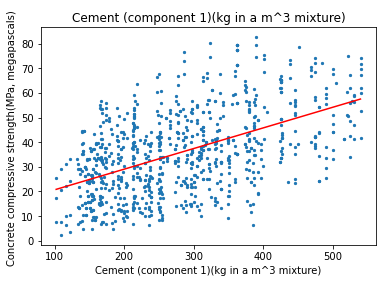

--------------------------------------------------------------------
Blast Furnace Slag (component 2)(kg in a m^3 mixture)
y = 0.02735686766654835x + 33.861093753662686
Train MSE 275.9804651592843
Explained varianvce for train dataset:  -2.4382626921869015
Test MSE 258.36008403450944
Explained varianvce for test dataset:  -2.3472337758209174




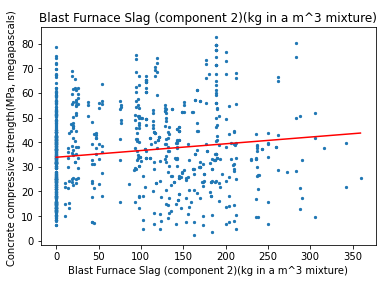

--------------------------------------------------------------------
Fly Ash (component 3)(kg in a m^3 mixture)
y = -0.03434431355339346x + 37.75959461933475
Train MSE 276.638865555915
Explained varianvce for train dataset:  -2.4464652782610643
Test MSE 270.6495508757912
Explained varianvce for test dataset:  -2.5064523279114757




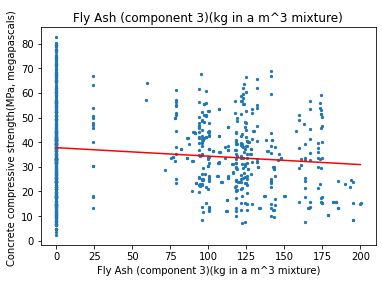

--------------------------------------------------------------------
Water  (component 4)(kg in a m^3 mixture)
y = -0.048260923152680046x + 44.19989486391541
Train MSE 272.5969131672566
Explained varianvce for train dataset:  -2.3961091992773618
Test MSE 252.42986296912306
Explained varianvce for test dataset:  -2.2704036558651794




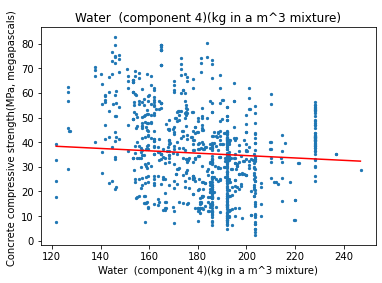

--------------------------------------------------------------------
Superplasticizer (component 5)(kg in a m^3 mixture)
y = 1.0271647707981104x + 29.434780085335955
Train MSE 243.23632108857566
Explained varianvce for train dataset:  -2.030324511196692
Test MSE 229.0063021130302
Explained varianvce for test dataset:  -1.966935206625016




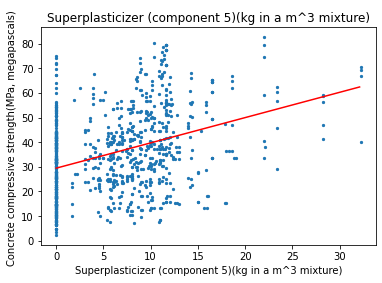

--------------------------------------------------------------------
Coarse Aggregate  (component 6)(kg in a m^3 mixture)
y = 0.0352918346774269x + 1.1570603655137859
Train MSE 304.27572309815207
Explained varianvce for train dataset:  -2.790775069035258
Test MSE 282.6262779818655
Explained varianvce for test dataset:  -2.6616191201930848




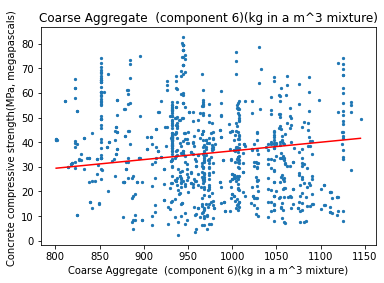

--------------------------------------------------------------------
Fine Aggregate (component 7)(kg in a m^3 mixture)
y = 0.04223844012619321x + 2.601380572020406
Train MSE 310.8560769178466
Explained varianvce for train dataset:  -2.8727554549534684
Test MSE 299.83206022227847
Explained varianvce for test dataset:  -2.884531942310132




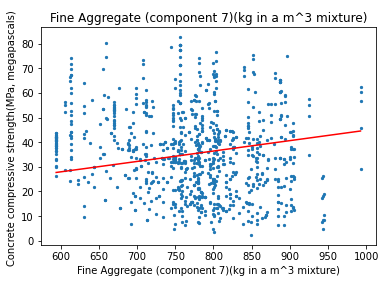

--------------------------------------------------------------------
Age (day)
y = 0.08669460261125252x + 31.88103544125717
Train MSE 250.29474860872563
Explained varianvce for train dataset:  -2.1182609091371405
Test MSE 237.29163907630306
Explained varianvce for test dataset:  -2.0742774837076485




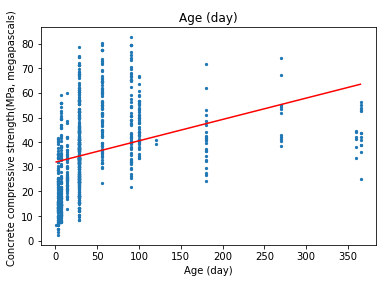

--------------------------------------------------------------------


In [10]:
max_iteration = 1000000
learning_rate = 0.000000001
for i, feature in enumerate(features[:-1]):
    x_train_i = x_train[:, i]
    x_test_i = x_test[:,i] 
    plot(features[i], x_train_i, x_test_i, y_train, y_test, max_iteration, learning_rate)

C) Optional extension 1 – Mean Absolute Error as the loss function
uni-variate linear regression y = f(x) = mx+b, using MAE as the loss function.  

In [11]:
def mae_function(x, y, m, b, n):
    y_pred = m * x + b
    return (1/n) * np.sum(np.abs(y - y_pred)) 

In [13]:
def univariate_linear_regression_mae(feature, x_train, x_test, y_train, y_test, max_iteration, learning_rate):
    m = 0
    b = 10
    iteration = 0
    n_train = len(x_train)
    n_test = len(x_test)
    mae = mae_function(x_train, y_train, m, b, n_train)
    pre_mae = float("inf")
    

    while iteration < max_iteration:
        pre_mae = mae
        m = m - learning_rate * derivate_m(x_train, y_train, m, b, n_train)
        b = b - learning_rate * derivate_b(x_train, y_train, m, b, n_train)
        mae = mae_function(x_train, y_train, m, b, n_train)
        iteration += 1
        if mae > pre_mae:
            learning_rate *= 0.8
        else:
            learning_rate *= 1.1
    
    
    train_mae = mae_function(x_train, y_train, m, b, n_train)
    test_mae = mae_function(x_test, y_test, m, b, n_test)
    train_variance = variance_function(train_mae, y_train)
    test_variance = variance_function(test_mae, y_test)
    print(feature)
    print("y = {}x + {}".format(m,b))
    print("Train MAE", train_mae)
    print("Explained varianvce for train dataset: ",train_variance )
    print("Test MAE", test_mae)
    print("Explained varianvce for test dataset: ",test_variance )
    print("\n")

    return mae, iteration, m, b

In [14]:
def plot_mae(feature, x_train, x_test, y_train, y_test, max_iteration, learning_rate):
    mse, iteration, m, b = univariate_linear_regression_mae(feature, x_train, x_test, y_train, y_test, max_iteration, learning_rate)
    plt.figure()
    plt.scatter(x_train, y_train, s=5)
    x_range = np.arange(np.min(x_train), np.max(x_train),0.1)
    y_range = m * x_range + b
    plt.plot(x_range, y_range, c="red")

    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel(features[-1])
    plt.show()
    plt.close()
    print("--------------------------------------------------------------------")

Cement (component 1)(kg in a m^3 mixture)
y = 0.0905626345492932x + 10.000278879229878
Train MAE 11.8870171326149
Explained varianvce for train dataset:  0.8519073170455471
Test MAE 11.839623212459472
Explained varianvce for test dataset:  0.8466094835901807




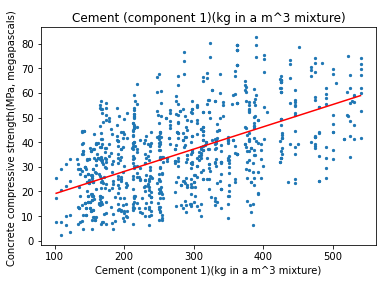

--------------------------------------------------------------------
Blast Furnace Slag (component 2)(kg in a m^3 mixture)
y = 0.15908499001187737x + 10.004049290168371
Train MAE 20.30098700214903
Explained varianvce for train dataset:  0.7470830908855287
Test MAE 20.86307294275797
Explained varianvce for test dataset:  0.7297044445453609




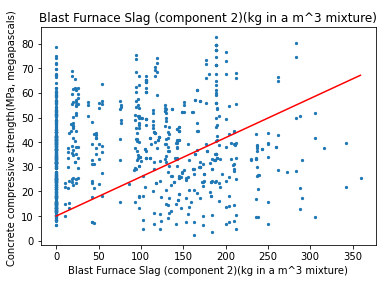

--------------------------------------------------------------------
Fly Ash (component 3)(kg in a m^3 mixture)
y = -0.03129589324618782x + 37.36407090540438
Train MAE 13.441546428105843
Explained varianvce for train dataset:  0.832540438750327
Test MAE 12.94593524005124
Explained varianvce for test dataset:  0.8322764452681408




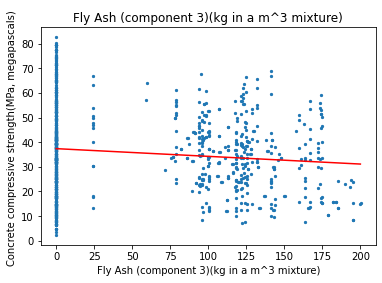

--------------------------------------------------------------------
Water  (component 4)(kg in a m^3 mixture)
y = 0.13593234324163211x + 10.000791669123952
Train MAE 14.307131922768754
Explained varianvce for train dataset:  0.821756667110983
Test MAE 13.39267706001814
Explained varianvce for test dataset:  0.8264885956687995




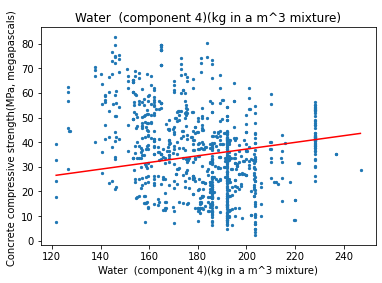

--------------------------------------------------------------------
Superplasticizer (component 5)(kg in a m^3 mixture)
y = 1.1380870805735346x + 28.106401074588046
Train MAE 12.73844310975634
Explained varianvce for train dataset:  0.8412999497064326
Test MAE 11.591787700602076
Explained varianvce for test dataset:  0.8498203642462892




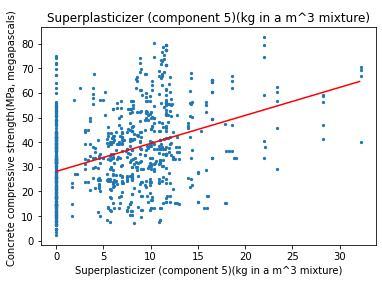

--------------------------------------------------------------------
Coarse Aggregate  (component 6)(kg in a m^3 mixture)
y = 0.026250327980512314x + 10.000027074463134
Train MAE 13.86389538695772
Explained varianvce for train dataset:  0.8272786653582636
Test MAE 12.953696392936548
Explained varianvce for test dataset:  0.8321758941587305




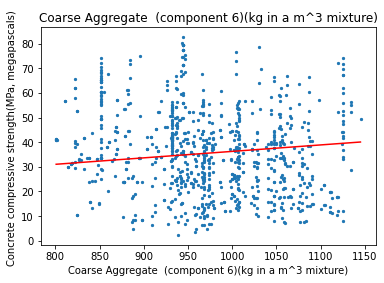

--------------------------------------------------------------------
Fine Aggregate (component 7)(kg in a m^3 mixture)
y = 0.03255001108246929x + 10.000041697168696
Train MAE 14.09557129102991
Explained varianvce for train dataset:  0.8243923646297308
Test MAE 13.373128583984046
Explained varianvce for test dataset:  0.8267418597110825




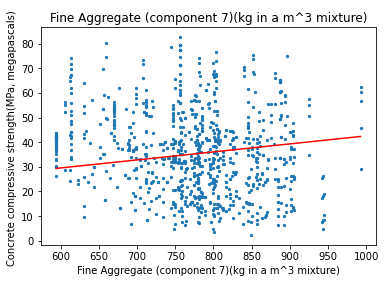

--------------------------------------------------------------------
Age (day)
y = 0.09851423115985664x + 30.277670431089728
Train MAE 12.690966920322593
Explained varianvce for train dataset:  0.8418914249429247
Test MAE 11.524418248886747
Explained varianvce for test dataset:  0.8506931821395127




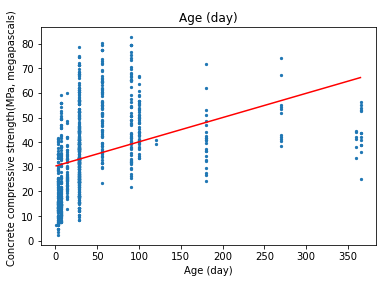

--------------------------------------------------------------------


In [16]:
max_iteration = 1000000
learning_rate = 0.00000001
for i, feature in enumerate(features[:-1]):
    x_train_i = x_train[:, i]
    x_test_i = x_test[:,i] 
    plot_mae(features[i], x_train_i, x_test_i, y_train, y_test, max_iteration, learning_rate)

D) Optional extension 2 – Data pre-processing (Normalization)
uni-variate linear regression y = f(x) = mx+b, using MSE as the loss function. 

 Histograms of feature values before normalizing 

/var/folders/j0/r2v90th55hsbqbd4mqp48mh80000gn/T/ipykernel_28741/2510247191.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  axes_1 = data.hist(ax = ax)


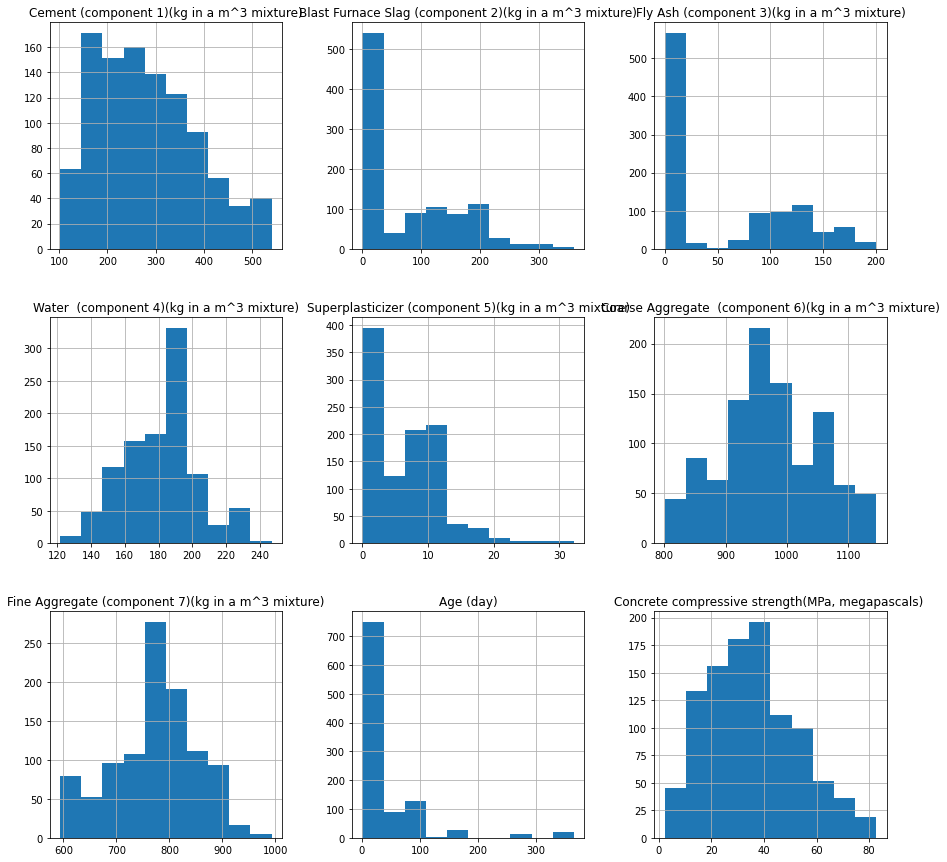

In [17]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
axes_1 = data.hist(ax = ax)

 Histograms of feature values after normalizing
 Normalization Formula: v_normalized = (v - min)/(max - min)

In [18]:
from sklearn import preprocessing
def normalization(data):
    result = data.copy()
    for feature_name in data.columns:
        max_value = data[feature_name].max()
        min_value = data[feature_name].min()
        result[feature_name] = (data[feature_name] - min_value) / (max_value - min_value)
    return result

In [19]:
normalized_data = normalization(data)
features = normalized_data.columns
normalized_data_array = np.array(normalized_data)
normalized_data 

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,1.000000,0.000000,0.000000,0.321357,0.077640,0.694767,0.205720,0.074176,0.967445
1,1.000000,0.000000,0.000000,0.321357,0.077640,0.738372,0.205720,0.074176,0.741964
2,0.526256,0.396494,0.000000,0.848303,0.000000,0.380814,0.000000,0.739011,0.472642
3,0.526256,0.396494,0.000000,0.848303,0.000000,0.380814,0.000000,1.000000,0.482400
4,0.220548,0.368392,0.000000,0.560878,0.000000,0.515698,0.580783,0.986264,0.522806
...,...,...,...,...,...,...,...,...,...
1025,0.398174,0.322760,0.451274,0.461876,0.276398,0.200872,0.437280,0.074176,0.522660
1026,0.502740,0.000000,0.577711,0.592814,0.322981,0.049128,0.550426,0.074176,0.359386
1027,0.106164,0.387869,0.542729,0.566467,0.189441,0.265698,0.466633,0.074176,0.266170
1028,0.130365,0.519477,0.000000,0.429940,0.350932,0.548256,0.488961,0.074176,0.379185


/var/folders/j0/r2v90th55hsbqbd4mqp48mh80000gn/T/ipykernel_28741/3825486897.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  axes_2 = normalized_data.hist(ax = ax1, color='green')


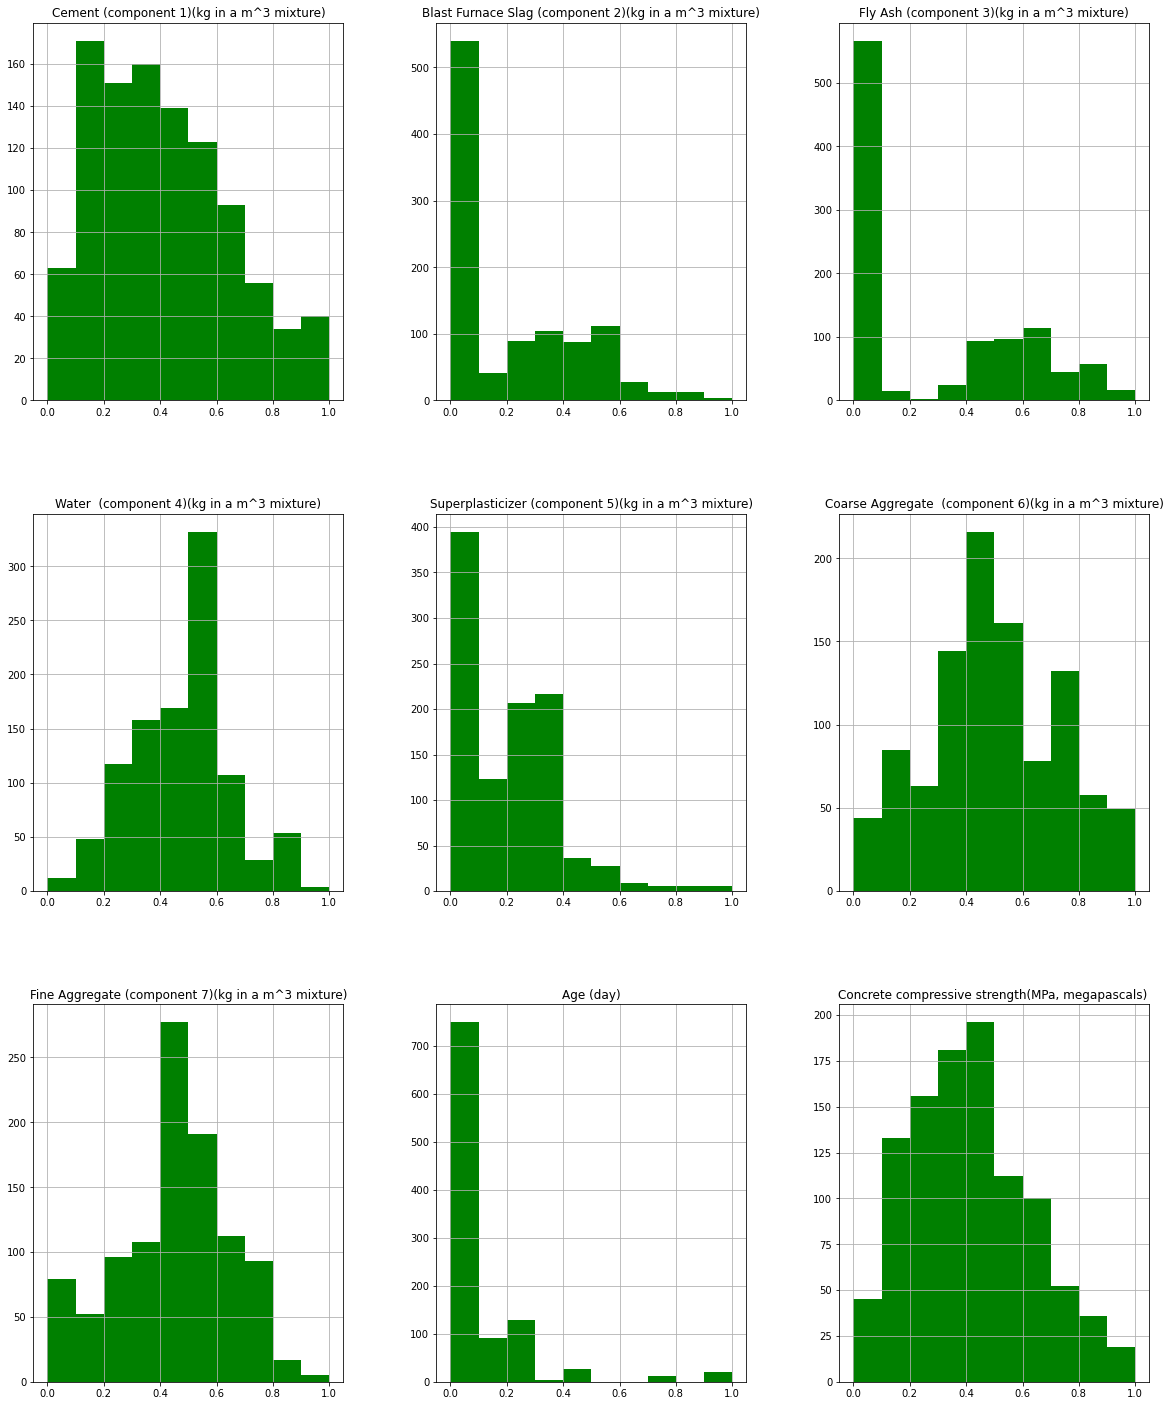

In [20]:
fig = plt.figure(figsize = (20,25))
ax1 = fig.gca()
axes_2 = normalized_data.hist(ax = ax1, color='green')

Split normalized data into test dataset and train dataset

In [21]:
normalized_x = normalized_data_array[:,:-1]
normalized_y = normalized_data_array[:,-1]
normalized_x_train, normalized_x_test, normalized_y_train, normalized_y_test = train_test_split(normalized_x, normalized_y, test_size=130, random_state=13)

Cement (component 1)(kg in a m^3 mixture)
y = 0.443979635442528x + 0.23701532334804312
Train MSE 0.032184050727085765
Explained varianvce for train dataset:  0.9678159492729143
Test MSE 0.03513597098497504
Explained varianvce for test dataset:  0.963461402333841




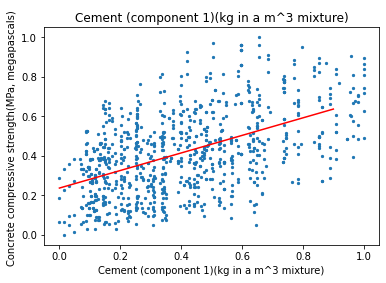

--------------------------------------------------------------------
Blast Furnace Slag (component 2)(kg in a m^3 mixture)
y = 0.12249128474396392x + 0.3928030432123886
Train MSE 0.0428350982511076
Explained varianvce for train dataset:  0.9571649017488923
Test MSE 0.04010022806029113
Explained varianvce for test dataset:  0.9582989722970016




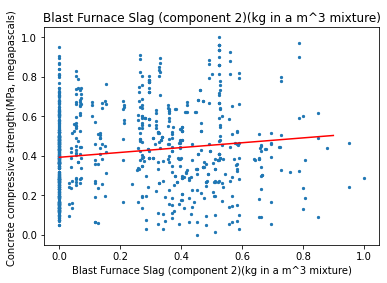

--------------------------------------------------------------------
Fly Ash (component 3)(kg in a m^3 mixture)
y = -0.08561753286297082x + 0.4413719559558537
Train MSE 0.04293728898283913
Explained varianvce for train dataset:  0.9570627110171609
Test MSE 0.04200768406882004
Explained varianvce for test dataset:  0.9563153707141298




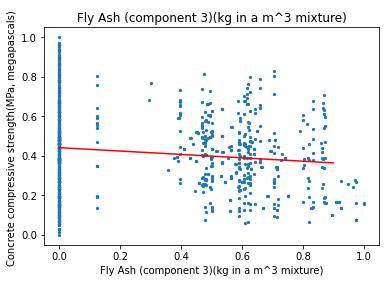

--------------------------------------------------------------------
Water  (component 4)(kg in a m^3 mixture)
y = -0.3524390133947921x + 0.5862548527586093
Train MSE 0.03999280809343465
Explained varianvce for train dataset:  0.9600071919065654
Test MSE 0.03723735989856429
Explained varianvce for test dataset:  0.9612761260514068




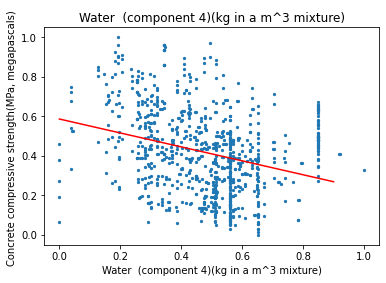

--------------------------------------------------------------------
Superplasticizer (component 5)(kg in a m^3 mixture)
y = 0.4120564343748915x + 0.33765846040834263
Train MSE 0.03775285944986598
Explained varianvce for train dataset:  0.962247140550134
Test MSE 0.03554420942105398
Explained varianvce for test dataset:  0.9630368670342722




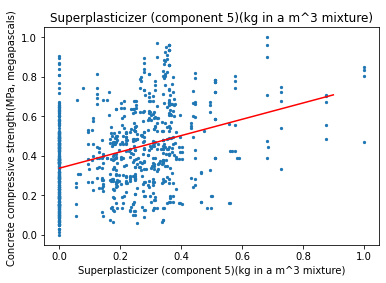

--------------------------------------------------------------------
Coarse Aggregate  (component 6)(kg in a m^3 mixture)
y = -0.15748287726735644x + 0.49687103362516893
Train MSE 0.04245007769954551
Explained varianvce for train dataset:  0.9575499223004544
Test MSE 0.039672880762266084
Explained varianvce for test dataset:  0.958743379283589




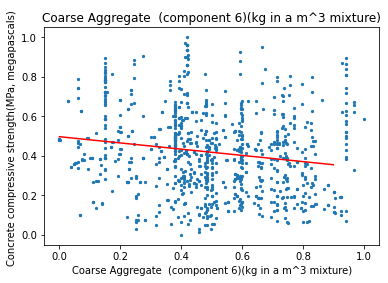

--------------------------------------------------------------------
Fine Aggregate (component 7)(kg in a m^3 mixture)
y = -0.1565097866773764x + 0.488979745935101
Train MSE 0.04267960177827226
Explained varianvce for train dataset:  0.9573203982217278
Test MSE 0.03789983923809205
Explained varianvce for test dataset:  0.9605872005607893




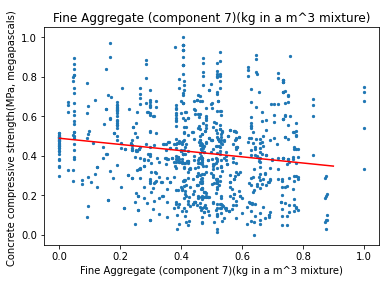

--------------------------------------------------------------------
Age (day)
y = 0.3931462524270607x + 0.3692148441748599
Train MSE 0.03884840233964791
Explained varianvce for train dataset:  0.9611515976603521
Test MSE 0.03683018166896248
Explained varianvce for test dataset:  0.9616995588210947




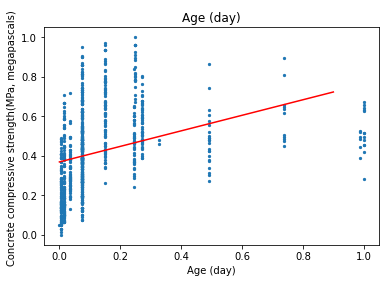

--------------------------------------------------------------------


In [24]:
max_iteration = 1000000
learning_rate = 0.00000001
for i, feature in enumerate(features[:-1]):
    normalized_x_train_i = normalized_x_train[:, i]
    normalized_x_test_i = normalized_x_test[:,i] 
    plot(features[i], normalized_x_train_i, normalized_x_test_i, normalized_y_train, normalized_y_test, max_iteration, learning_rate)